In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data  
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 40
EPOCH = 1

# Load the input tensor we saved in earlier practice

In [3]:
train_x = torch.load('./train_x.tensor')  
train_y = torch.load('./train_y.tensor')  

In [4]:
train_x.shape

torch.Size([400, 80, 80, 3])

In [5]:
train_y.shape

torch.Size([400, 1])

# Reshape train_x

In [6]:
train_x = train_x.view(400, 3, 80, 80)

# Reshape train_y from 25000x1 to 25000

In [7]:
train_y = train_y.view(400)

In [8]:
train_y.shape

torch.Size([400])

# Build tensor data set and data loader 

In [9]:
train_x = train_x.type(torch.FloatTensor)

In [10]:
train_y = train_y.type(torch.LongTensor)

In [11]:
torch_dataset = Data.TensorDataset(data_tensor=train_x, target_tensor=train_y)

In [12]:
loader = Data.DataLoader(
    dataset=torch_dataset,     # torch TensorDataset format
    batch_size=BATCH_SIZE,       # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

# Define and build CNN

In [13]:
train_x.shape

torch.Size([400, 3, 80, 80])

In [14]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (3, 80, 80)
            nn.Conv2d(
                in_channels=3,              # input height
                out_channels=12,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (12, 40, 40)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (12, 40, 40)
        )
        self.conv2 = nn.Sequential(         # input shape (12, 40, 40)
            nn.Conv2d(12, 36, 5, 1, 2),      # n_filter = 3*12 = 36, output shape (36, 40, 40)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (36, 20, 20)
        )
        self.out = nn.Linear(14400, 2) # fully connected layer, output 2 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [15]:
cnn = CNN()

In [16]:
cnn

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(12, 36, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (out): Linear(in_features=14400, out_features=2, bias=True)
)

In [17]:
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.02)

In [18]:
loss_func = torch.nn.CrossEntropyLoss()

# Run one training epoc step by step to examine the variable  

In [19]:
# get one batch of data
for step, (batch_x, batch_y) in enumerate(loader):
    break;

In [20]:
step

0

In [21]:
print(batch_x.shape, batch_y.shape)

torch.Size([40, 3, 80, 80]) torch.Size([40])


In [22]:
batch_x = Variable(batch_x)
batch_y = Variable(batch_y)

In [23]:
out = cnn(batch_x)

In [24]:
out

(Variable containing:
 -14.2637   3.1652
 -15.2413  -7.0147
  -9.9537  -5.6020
 -21.1664  -6.3521
 -13.4178  -7.5347
 -13.7158  -6.8799
 -16.8532  -2.0573
 -15.2439   9.4118
 -16.0836  -3.8639
 -25.0323  -3.5284
 -12.3097  -2.0575
 -15.7646  -0.4734
 -11.5320  -0.5593
 -13.7512  -7.5303
 -17.2823  -2.5499
 -11.2805  -0.0536
 -13.3761  -2.4788
  -8.7061   2.1706
 -22.3941  -8.5999
 -11.7976  -2.3974
 -16.0441  -9.8213
 -11.0640  -0.0371
  -8.8809  -1.2715
 -12.1680  -6.4423
 -17.4589  -8.5322
 -10.9814   4.1376
 -15.9178  -5.0377
 -10.0057   0.6460
 -21.3824  -5.3383
  -6.9207  -3.7532
 -19.3837   0.7918
 -15.4775  -0.2395
  -7.1058  -7.7887
 -15.1280  -1.7614
  -9.4053   4.0474
 -13.9207   0.5427
 -16.8784  -2.6423
 -14.5297   1.0223
 -18.5430  -3.2050
  -8.2019   0.3173
 [torch.FloatTensor of size 40x2], Variable containing:
   25.9010   44.6606   40.4488  ...     0.0000    0.0000    0.0000
   33.4762   40.8204   17.4253  ...    19.1678   20.1235    7.2084
   53.4541   52.4807   17.59

In [25]:
out[0]

Variable containing:
-14.2637   3.1652
-15.2413  -7.0147
 -9.9537  -5.6020
-21.1664  -6.3521
-13.4178  -7.5347
-13.7158  -6.8799
-16.8532  -2.0573
-15.2439   9.4118
-16.0836  -3.8639
-25.0323  -3.5284
-12.3097  -2.0575
-15.7646  -0.4734
-11.5320  -0.5593
-13.7512  -7.5303
-17.2823  -2.5499
-11.2805  -0.0536
-13.3761  -2.4788
 -8.7061   2.1706
-22.3941  -8.5999
-11.7976  -2.3974
-16.0441  -9.8213
-11.0640  -0.0371
 -8.8809  -1.2715
-12.1680  -6.4423
-17.4589  -8.5322
-10.9814   4.1376
-15.9178  -5.0377
-10.0057   0.6460
-21.3824  -5.3383
 -6.9207  -3.7532
-19.3837   0.7918
-15.4775  -0.2395
 -7.1058  -7.7887
-15.1280  -1.7614
 -9.4053   4.0474
-13.9207   0.5427
-16.8784  -2.6423
-14.5297   1.0223
-18.5430  -3.2050
 -8.2019   0.3173
[torch.FloatTensor of size 40x2]

In [26]:
loss = loss_func(out[0], batch_y)
print(loss)

Variable containing:
 5.6483
[torch.FloatTensor of size 1]



In [27]:
loss.data[0]

5.648260593414307

# Train the MLP 

In [28]:
losslst = []
for epoch in range(EPOCH):   # train entire dataset EPOCH times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        print('Epoch:', epoch, '| step:', step, end = ' ')
        #print('| batch_x:', batch_x.shape, '| batch_y: ', batch_y.shape, end = '')
        batch_x = Variable(batch_x)
        batch_y = Variable(batch_y)
        out = cnn(batch_x)[0]
        #print('| out: ', out.shape, end = '')
        loss = loss_func(out, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('train loss: ', loss.data[0])
        losslst.append(loss.data[0])
    epoch = epoch + 1

Epoch: 0 | step: 0 train loss:  4.836156368255615
Epoch: 0 | step: 1 train loss:  1629614.625
Epoch: 0 | step: 2 train loss:  10.032463073730469
Epoch: 0 | step: 3 train loss:  3.548372983932495
Epoch: 0 | step: 4 train loss:  0.6919246912002563
Epoch: 0 | step: 5 train loss:  0.7017200589179993
Epoch: 0 | step: 6 train loss:  0.6926011443138123
Epoch: 0 | step: 7 train loss:  0.6934135556221008
Epoch: 0 | step: 8 train loss:  0.6933775544166565
Epoch: 0 | step: 9 train loss:  0.6929656267166138


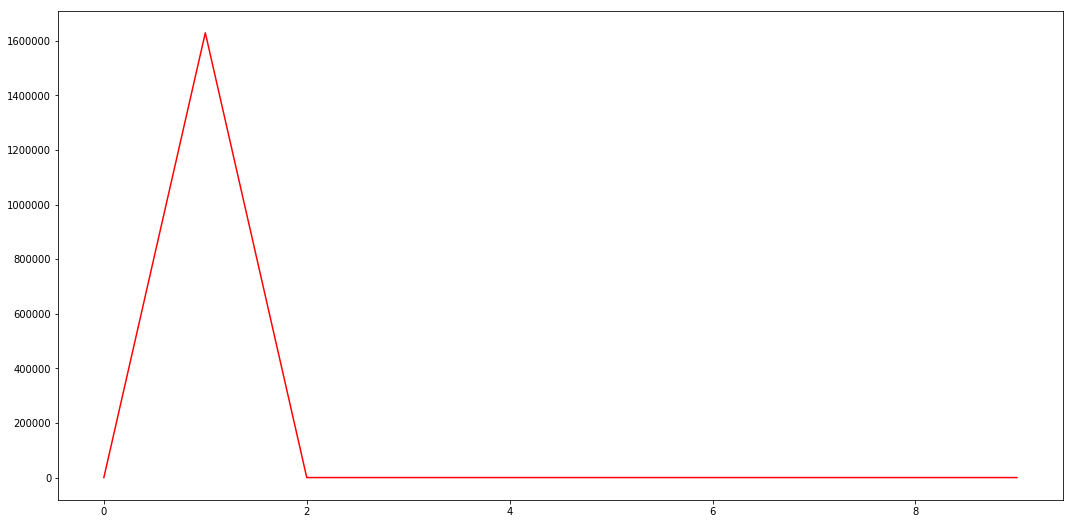

In [29]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.plot(losslst, color = 'red')
plt.show()